In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"

In [3]:
tesla = pd.read_csv(url, delimiter=',',
                         usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
tesla_clean = pd.read_csv(url, delimiter=',',
                               usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'], errors='coerce') 

In [5]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,34334500


In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2845 non-null   datetime64[ns]
 1   Open    2845 non-null   float64       
 2   High    2845 non-null   float64       
 3   Low     2845 non-null   float64       
 4   Close   2845 non-null   float64       
 5   Volume  2845 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 133.5 KB


In [7]:
tesla['Date']=tesla['Date'].map(datetime.datetime.toordinal)

In [8]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,733952,3.800,5.000,3.508,4.778,93831500
1,733953,5.158,6.084,4.660,4.766,85935500
2,733954,5.000,5.184,4.054,4.392,41094000
3,733955,4.600,4.620,3.742,3.840,25699000
4,733959,4.000,4.000,3.166,3.222,34334500


<AxesSubplot:xlabel='Date', ylabel='High'>

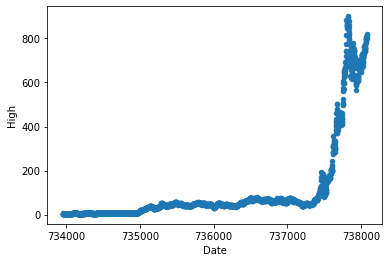

In [9]:
tesla.plot.scatter(x = 'Date', y = 'High')

In [10]:
# -- Skalerer dataset --

#x = tesla.values #returns a numpy array
#scaler = preprocessing.MinMaxScaler().fit(x)
#x = scaler.transform(x)
#tesla = pd.DataFrame(x)
#To keep column names do
#df[list(df.columns)] = scaler.transform(df)
#instead of line 3 and 4

In [11]:
# -- Trene modellen --

# Exctract Var1 and result from the dataset
X = pd.DataFrame(tesla['Date']) #Date
y = pd.DataFrame(tesla['High']) #High

In [12]:
#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

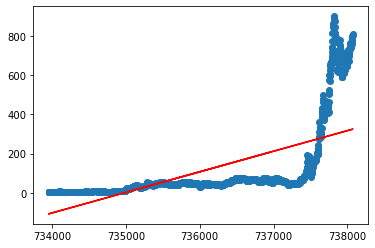

MSE = 21897.87227674075


In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

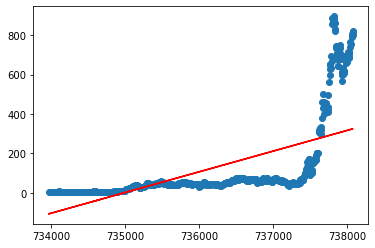

MSE = 21529.034997700506


In [15]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [16]:
# -- Splitting your sets into training and testing is important so you can verify your model on "unseen" data --

In [17]:
#tesla['Trent'] = df[0]*df[2]   # ????? Lager en ny kolonne fordi 0 og 2 kan korelere

In [46]:
x = tesla.iloc[:, 0:1].values 
#print(x)
y = tesla.iloc[:, 2:3].values
print(y)
#x = pd.DataFrame(tesla['Date']) #Date
# = pd.DataFrame(tesla['High']) #High

[[  5.      ]
 [  6.084   ]
 [  5.184   ]
 ...
 [812.320007]
 [815.409973]
 [820.25    ]]


In [47]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,733952,3.800,5.000,3.508,4.778,93831500
1,733953,5.158,6.084,4.660,4.766,85935500
2,733954,5.000,5.184,4.054,4.392,41094000
3,733955,4.600,4.620,3.742,3.840,25699000
4,733959,4.000,4.000,3.166,3.222,34334500


In [54]:
# Fitting Random Forest Regression to the dataset
# import the regressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)

C:\Users\Danie\AppData\Local\Temp/ipykernel_10184/3243978137.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


RandomForestRegressor(random_state=0)

In [55]:
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values

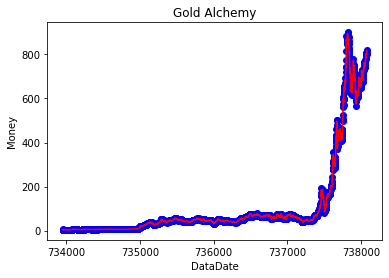

In [56]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
         color = 'red') 
plt.title('Gold Alchemy')
plt.xlabel('DataDate')
plt.ylabel('Money')
plt.show()